In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
import sys
import seaborn as sns

In [3]:
df= pd.read_csv("/content/drive/MyDrive/remote desk/bank-additional-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#data prepare
col_names = ["age", "job", "marital", "education", "default","housing","loan","contact","month",
"day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx",
"cons.conf.idx","euribor3m","nr.employed","y"]
class_names = ["yes", "no"]
job_to_int={"admin.":0,"blue-collar":1,"entrepreneur":2,"housemaid":3,"management":4,"retired":5,"self-employed":6,
"services":7,"student":8,"technician":9,"unemployed":10,"unknown":11}
marital_to_int={"divorced":0,"married":1,"single":2,"unknown":3}
education_to_int={"basic.4y":0,"basic.6y":1,"basic.9y":2,"high.school":3,"illiterate":4,"professional.course":5,
"university.degree":6,"unknown":7}
default_to_int={"no":0,"yes":1,"unknown":2}
housing_to_int={"no":0,"yes":1,"unknown":2}
loan_to_int={"no":0,"yes":1,"unknown":2}
contact_to_int={"cellular":0,"telephone":1}
month_to_int={"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,
              "aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
day_to_int={"mon":0,"tue":1,"wed":2,"thu":3,"fri":4}
poutcome_to_int={"failure":0,"nonexistent":1,"success":2}
class_to_int = {"yes": 0, "no": 1}

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


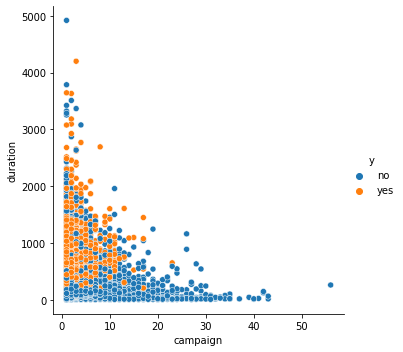

In [ ]:
sns.relplot(df['campaign'],df['duration'],hue=df['y'])
plt.show()

In [6]:
df.isnull().sum() # no missing value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
#new data frame
total=[]

for index,row in df.iterrows():
  temp = []
  temp.append(row['age'])
  temp.append(job_to_int[row['job']])
  temp.append(marital_to_int[row['marital']])
  temp.append(education_to_int[row['education']])
  temp.append(default_to_int[row['default']])
  temp.append(housing_to_int[row['housing']])
  temp.append(loan_to_int[row['loan']])
  temp.append(contact_to_int[row['contact']])
  temp.append(month_to_int[row['month']])
  temp.append(day_to_int[row['day_of_week']])
  temp.append(row['duration'])
  temp.append(row['campaign'])
  temp.append(row['pdays'])
  temp.append(row['previous'])
  temp.append(poutcome_to_int[row['poutcome']])
  temp.append(row['emp.var.rate'])
  temp.append(row['cons.price.idx'])
  temp.append(row['cons.conf.idx'])
  temp.append(row['euribor3m'])
  temp.append(row['nr.employed'])
  temp.append(class_to_int[row['y']])
  total.append(temp)
  

In [12]:
new_df=pd.DataFrame(total)
new_df.columns=col_names
print (new_df.describe())

               age          job       marital     education       default  \
count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.02406      3.72458      1.172769      3.747184      0.417525   
std       10.42125      3.59456      0.608902      2.136482      0.812813   
min       17.00000      0.00000      0.000000      0.000000      0.000000   
25%       32.00000      0.00000      1.000000      2.000000      0.000000   
50%       38.00000      2.00000      1.000000      3.000000      0.000000   
75%       47.00000      7.00000      2.000000      6.000000      0.000000   
max       98.00000     11.00000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.571914      0.199767      0.365252      5.607896      1.979581   
std        0.541209      0.456002      0.481507      2.040998      1.

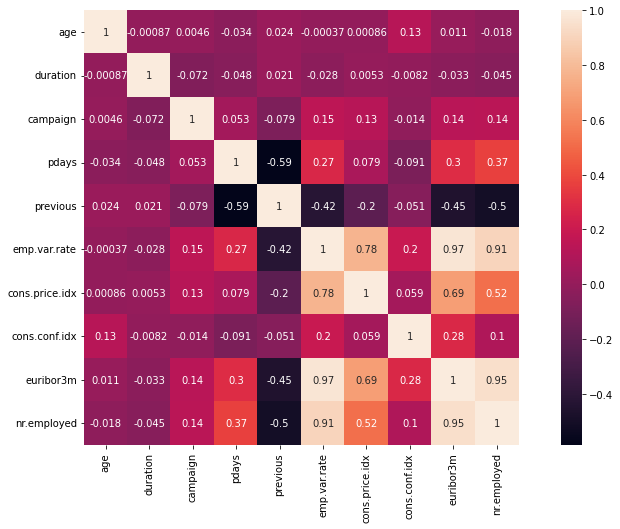

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df.iloc[:,:-1].corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns,square=True, annot=True)
plt.show()

In [13]:
len_no=len(new_df[new_df['y']==0])
len_yes=len(new_df[new_df['y']==1])

36548 36548
36548 4640


<ipython-input-14-e2a9e3468cc7>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  len_new_yes=len(y[[y==1]])
<ipython-input-14-e2a9e3468cc7>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  len_new_no=len(y[[y==0]])
<ipython-input-14-e2a9e3468cc7>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a 

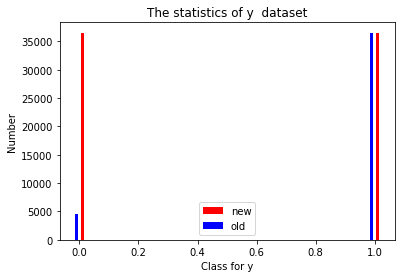

In [14]:
#normalized
from imblearn.over_sampling import SMOTE
total = np.array(total)
X=total[:,0:20]
y = df['y'].values
y = np.array([class_to_int[c] for c in y])
more_sample = SMOTE(random_state=21)
X, y = more_sample.fit_resample(X, y)
len_new_yes=len(y[[y==1]])
len_new_no=len(y[[y==0]])
print (len_new_yes,len_new_no)
print (len_yes,len_no)

plt.xlabel('Class for y')
plt.ylabel('Number')
plt.title('The statistics of y  dataset')
x_new=[0.01,1.01]
x_old=[-0.01,0.99]
old=[len_no,len_yes]
new=[len_new_no,len_new_yes]
plt.subplot(1,1,1)
plt.ylim=(0, 10)
plt.bar(x_new, new, facecolor='red', width=0.01, label = 'new')
plt.bar(x_old, old, facecolor='blue', width=0.01, label = 'old')
plt.legend()

plt.show()

In [ ]:
total

array([[5.6000e+01, 3.0000e+00, 1.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        1.0000e+00],
       [5.7000e+01, 7.0000e+00, 1.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        1.0000e+00],
       [3.7000e+01, 7.0000e+00, 1.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        1.0000e+00],
       ...,
       [5.6000e+01, 5.0000e+00, 1.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        1.0000e+00],
       [4.4000e+01, 9.0000e+00, 1.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        0.0000e+00],
       [7.4000e+01, 5.0000e+00, 1.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        1.0000e+00]])

In [ ]:
new_df.iloc[:, [10, 19]].describe()

,duration,nr.employed
count,41188.000000,41188.000000
mean,258.285010,5167.035911
std,259.279249,72.251528
min,0.000000,4963.600000
25%,102.000000,5099.100000
50%,180.000000,5191.000000
75%,319.000000,5228.100000
max,4918.000000,5228.100000


In [15]:
print (X[:,[10,19]])
scaler = MinMaxScaler( )
scaler.fit(X[:,10].reshape(-1,1))
X[:,10]=scaler.transform(X[:,1].reshape(-1,1)).reshape(1,-1)
scal = MinMaxScaler( )
scal.fit(X[:,19].reshape(-1,1))
X[:,19]=scal.transform(X[:,19].reshape(-1,1)).reshape(1,-1)
print (X[:,[1,19]])

X = X[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]]#without low convariance

[[ 261.         5191.        ]
 [ 149.         5191.        ]
 [ 226.         5191.        ]
 ...
 [ 816.44274115 5228.1       ]
 [ 193.06729218 5017.5       ]
 [ 175.7696771  5076.2       ]]
[[3.         0.85973535]
 [7.         0.85973535]
 [7.         0.85973535]
 ...
 [2.21370573 1.        ]
 [0.         0.20378072]
 [0.2303229  0.42570888]]


In [19]:
def draw_acc(x_plot,y_plot):
  fig, ax = plt.subplots()
  ax.plot(x_plot, y_plot, 'o')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

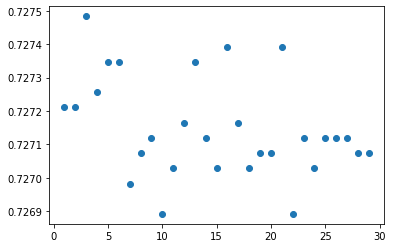

In [ ]:
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #30%test
x_plot=[]
y_plot=[]
for step in range(1, 30):
  logistic_regression=LogisticRegression(C=step/100., solver='sag', multi_class='multinomial')
  logistic_regression.fit(X_train, y_train)
  pred=logistic_regression.predict(X_test)
  acc=accuracy_score(y_test, pred)
  x_plot.append(step)
  y_plot.append(acc)

draw_acc(x_plot=x_plot,y_plot=y_plot)

In [ ]:
#c=0.19 ensemble
model=[]
res=[]
for i in range(0, 15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
  logistic_regression=LogisticRegression(C=0.19, solver='sag', multi_class='multinomial')
  logistic_regression.fit(X_train, y_train)
  pred=logistic_regression.predict(X_test)
  acc=accuracy_score(y_test, pred)
  model.append(logistic_regression)
  res.append(acc)

avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

final result : 0.729111 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

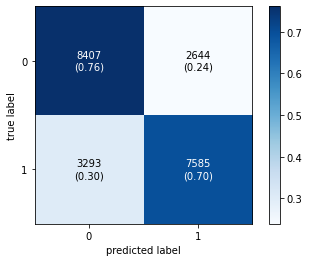

In [ ]:
# Evaluate the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
int_to_class = {0: "yes", 1: "no"}
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall score: %.3f' % recall_score(y_test, pred))

Precision: 0.498
Recall score: 0.514


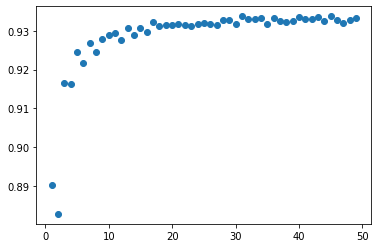

In [ ]:
#random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_plot=[]
y_plot=[]
for step in range(1, 50):
  rf_model=RandomForestClassifier(n_estimators=step)
  rf_model.fit(X_train, y_train)
  pred=rf_model.predict(X_test)
  acc=accuracy_score(y_test, pred)
  x_plot.append(step)
  y_plot.append(acc)

draw_acc(x_plot=x_plot,y_plot=y_plot)

In [ ]:
model=[]
res=[]
for step in range(0, 15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=step) #random select
  rf_model=RandomForestClassifier(n_estimators=49)
  rf_model.fit(X_train, y_train)
  pred=rf_model.predict(X_test)
  acc=accuracy_score(y_test, pred)
  model.append(rf_model)
  res.append(acc)
avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

final result : 0.933574 


<Figure size 432x288 with 0 Axes>

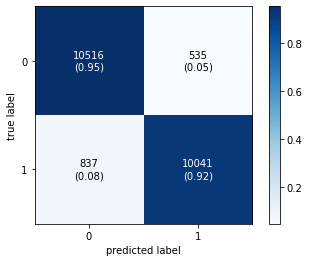

In [ ]:
int_to_class = {0: "yes", 1: "no"}
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall score: %.3f' % recall_score(y_test, pred))

Precision: 0.498
Recall score: 0.514


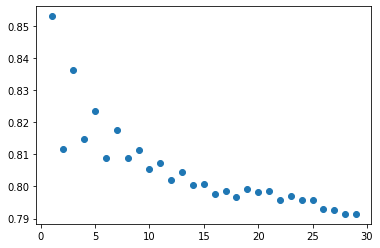

In [ ]:
#KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)
x_plot=[]
y_plot=[]
for step in range(1, 30):
  knn_model = KNeighborsClassifier(n_neighbors=step)
  knn_model.fit(X_train, y_train)
  pred=knn_model.predict(X_test)
  acc=accuracy_score(y_test, pred)
  x_plot.append(step)
  y_plot.append(acc)
draw_acc(x_plot=x_plot,y_plot=y_plot)

In [ ]:
model=[]
res=[]
for i in range(0, 15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
  knn_model = KNeighborsClassifier(n_neighbors=1)
  knn_model.fit(X_train, y_train)
  pred=knn_model.predict(X_test)
  acc=accuracy_score(y_test, pred)
  model.append(knn_model)
  res.append(acc)

avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

final result : 0.852795 


<Figure size 432x288 with 0 Axes>

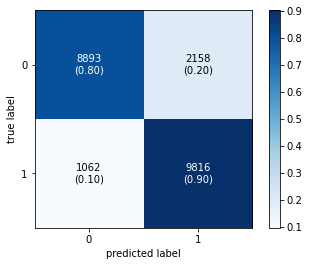

In [ ]:
# Evaluate the confusion matrix
cnf_matrix = confusion_matrix([int_to_class[c] for c in y_test], [int_to_class[c] for c in pred])

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall score: %.3f' % recall_score(y_test, pred))

Precision: 0.893
Recall score: 0.805
